# The notebook based on the random-selected dataset4.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('training set4.csv')

### Transform the event_time into type of (midnight, forenoon, afternoon and evening)

In [3]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,05,view,9200501,2053013552913973497,computers.peripherals.keyboard,steelseries,87.26,513589329,56671c43-6679-4b81-8425-7ffe80876522
1,16,view,1004835,2053013555631882655,electronics.smartphone,samsung,230.89,515126221,063b27b7-691f-4634-a3b9-78e40e953656
2,01,view,44700053,2104564977229628393,NaN,lux,77.22,512685071,6f7b8e19-af43-402e-a0db-eb7ed03d22d1
3,12,view,26400277,2053013563651392361,NaN,lucente,143.38,547481971,745e0ae0-b04d-47bb-89b6-7ef7bb884a57
4,06,view,21400996,2053013561579406073,electronics.clocks,casio,79.54,517185571,f8e13200-d5eb-49b8-a244-d17990fccddc
5,13,view,15200779,2053013553484398879,NaN,volta,38.87,553717577,c44709aa-ec62-4ac5-a550-0c1a7719d2be
6,10,view,1005003,2053013555631882655,electronics.smartphone,huawei,241.90,548763997,5cac7762-1466-4808-bb9b-1108dd93b6dc
7,02,view,22700084,2053013556168753601,NaN,force,239.33,558635153,362daac8-c8f0-45ef-9edb-417f9305f2a9
8,11,view,15700107,2053013559733912211,NaN,NaN,355.99,537212697,1f1f671c-e02e-44c9-b0e1-c141ebbca028
9,05,view,52000074,2137704922018218396,NaN,conceptclub,51.22,551760958,05c89c51-aab0-4728-b57e-817a416284f4


In [4]:
for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'

In [5]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,midnight,view,9200501,2053013552913973497,computers.peripherals.keyboard,steelseries,87.26,513589329,56671c43-6679-4b81-8425-7ffe80876522
1,afternoon,view,1004835,2053013555631882655,electronics.smartphone,samsung,230.89,515126221,063b27b7-691f-4634-a3b9-78e40e953656
2,midnight,view,44700053,2104564977229628393,NaN,lux,77.22,512685071,6f7b8e19-af43-402e-a0db-eb7ed03d22d1
3,afternoon,view,26400277,2053013563651392361,NaN,lucente,143.38,547481971,745e0ae0-b04d-47bb-89b6-7ef7bb884a57
4,forenoon,view,21400996,2053013561579406073,electronics.clocks,casio,79.54,517185571,f8e13200-d5eb-49b8-a244-d17990fccddc


### Drop out the missing value.

In [6]:
train=train.dropna()

# Develop a (Xtrain，Ytrain) set.

In [8]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [9]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,midnight,9200501,2053013552913973497,computers.peripherals.keyboard,steelseries,87.26,513589329,56671c43-6679-4b81-8425-7ffe80876522
1,afternoon,1004835,2053013555631882655,electronics.smartphone,samsung,230.89,515126221,063b27b7-691f-4634-a3b9-78e40e953656
4,forenoon,21400996,2053013561579406073,electronics.clocks,casio,79.54,517185571,f8e13200-d5eb-49b8-a244-d17990fccddc
6,forenoon,1005003,2053013555631882655,electronics.smartphone,huawei,241.90,548763997,5cac7762-1466-4808-bb9b-1108dd93b6dc
10,afternoon,1002524,2053013555631882655,electronics.smartphone,apple,531.29,522090974,23124d34-f2a4-4ce3-8808-aac5e8f5124d
...,...,...,...,...,...,...,...,...
9991,midnight,28713583,2053013565228450757,apparel.shoes,greyder,102.96,574694166,2a717322-a6e5-49e6-a794-088f8f109192
9995,forenoon,1307076,2053013558920217191,computers.notebook,asus,668.25,515532956,a3fecac3-bf84-4794-8ed5-d9b7bc7ce2bc
9996,forenoon,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,514179661,89de9ea7-4c51-4ea9-bd6e-32ae93e54e22
9997,forenoon,21407628,2053013561579406073,electronics.clocks,casio,24.68,540590356,2bfc0fab-a9cd-42db-bde9-1b15991f456e


In [10]:
Y

0       view
1       view
4       view
6       view
10      view
        ... 
9991    view
9995    view
9996    view
9997    view
9999    view
Name: event_type, Length: 6254, dtype: object

### LabelEncoder

In [11]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [12]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,3,9200501,2053013552913973497,66,427,87.26,513589329,2074
1,0,1004835,2053013555631882655,87,397,230.89,515126221,150
4,2,21400996,2053013561579406073,86,96,79.54,517185571,6062
6,2,1005003,2053013555631882655,87,211,241.90,548763997,2238
10,0,1002524,2053013555631882655,87,30,531.29,522090974,852
...,...,...,...,...,...,...,...,...
9991,3,28713583,2053013565228450757,10,194,102.96,574694166,1031
9995,2,1307076,2053013558920217191,64,44,668.25,515532956,3994
9996,2,1004767,2053013555631882655,87,397,246.52,514179661,3349
9997,2,21407628,2053013561579406073,86,96,24.68,540590356,1057


In [13]:
Y

0       view
1       view
4       view
6       view
10      view
        ... 
9991    view
9995    view
9996    view
9997    view
9999    view
Name: event_type, Length: 6254, dtype: object

In [14]:
df=pd.concat([X,Y],axis=1)
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,3,9200501,2053013552913973497,66,427,87.26,513589329,2074,view
1,0,1004835,2053013555631882655,87,397,230.89,515126221,150,view
4,2,21400996,2053013561579406073,86,96,79.54,517185571,6062,view
6,2,1005003,2053013555631882655,87,211,241.90,548763997,2238,view
10,0,1002524,2053013555631882655,87,30,531.29,522090974,852,view


In [15]:
product_tags = df.iloc[:, 8]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
df.iloc[:, 8] = label

In [16]:
df

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,3,9200501,2053013552913973497,66,427,87.26,513589329,2074,2
1,0,1004835,2053013555631882655,87,397,230.89,515126221,150,2
4,2,21400996,2053013561579406073,86,96,79.54,517185571,6062,2
6,2,1005003,2053013555631882655,87,211,241.90,548763997,2238,2
10,0,1002524,2053013555631882655,87,30,531.29,522090974,852,2
...,...,...,...,...,...,...,...,...,...
9991,3,28713583,2053013565228450757,10,194,102.96,574694166,1031,2
9995,2,1307076,2053013558920217191,64,44,668.25,515532956,3994,2
9996,2,1004767,2053013555631882655,87,397,246.52,514179661,3349,2
9997,2,21407628,2053013561579406073,86,96,24.68,540590356,1057,2


# Visualization and data analysis

In [17]:
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,midnight,view,9200501,2053013552913973497,computers.peripherals.keyboard,steelseries,87.26,513589329,56671c43-6679-4b81-8425-7ffe80876522
1,afternoon,view,1004835,2053013555631882655,electronics.smartphone,samsung,230.89,515126221,063b27b7-691f-4634-a3b9-78e40e953656
4,forenoon,view,21400996,2053013561579406073,electronics.clocks,casio,79.54,517185571,f8e13200-d5eb-49b8-a244-d17990fccddc
6,forenoon,view,1005003,2053013555631882655,electronics.smartphone,huawei,241.90,548763997,5cac7762-1466-4808-bb9b-1108dd93b6dc
10,afternoon,view,1002524,2053013555631882655,electronics.smartphone,apple,531.29,522090974,23124d34-f2a4-4ce3-8808-aac5e8f5124d
...,...,...,...,...,...,...,...,...,...
9991,midnight,view,28713583,2053013565228450757,apparel.shoes,greyder,102.96,574694166,2a717322-a6e5-49e6-a794-088f8f109192
9995,forenoon,view,1307076,2053013558920217191,computers.notebook,asus,668.25,515532956,a3fecac3-bf84-4794-8ed5-d9b7bc7ce2bc
9996,forenoon,view,1004767,2053013555631882655,electronics.smartphone,samsung,246.52,514179661,89de9ea7-4c51-4ea9-bd6e-32ae93e54e22
9997,forenoon,view,21407628,2053013561579406073,electronics.clocks,casio,24.68,540590356,2bfc0fab-a9cd-42db-bde9-1b15991f456e


In [18]:
train.describe()

,product_id,category_id,price,user_id
count,6.254000e+03,6.254000e+03,6254.000000,6.254000e+03
mean,6.218023e+06,2.056199e+18,363.520708,5.368577e+08
std,1.190701e+07,1.736231e+16,388.451540,2.156536e+07
min,1.000978e+06,2.053014e+18,1.300000,2.966535e+08
25%,1.004886e+06,2.053014e+18,111.110000,5.163830e+08
50%,1.801690e+06,2.053014e+18,226.105000,5.330474e+08
75%,5.100338e+06,2.053014e+18,463.310000,5.566480e+08
max,1.000225e+08,2.179888e+18,2574.040000,5.798391e+08


In [19]:
train["event_time"].value_counts()

afternoon    2359
forenoon     2023
midnight     1076
evening       796
Name: event_time, dtype: int64

In [20]:
train["event_time"].value_counts()

afternoon    2359
forenoon     2023
midnight     1076
evening       796
Name: event_time, dtype: int64

In [21]:
train["brand"].value_counts()

samsung      1185
apple         957
xiaomi        628
huawei        245
lg            140
             ... 
microsoft       1
salomon         1
annaanna        1
hayali          1
preciosa        1
Name: brand, Length: 496, dtype: int64

In [22]:
train["price"].value_counts()

154.42    27
308.86    25
128.42    24
334.60    24
231.64    24
          ..
369.20     1
531.67     1
310.66     1
140.80     1
27.00      1
Name: price, Length: 3404, dtype: int64

Saving figure attribute_histogram_plots


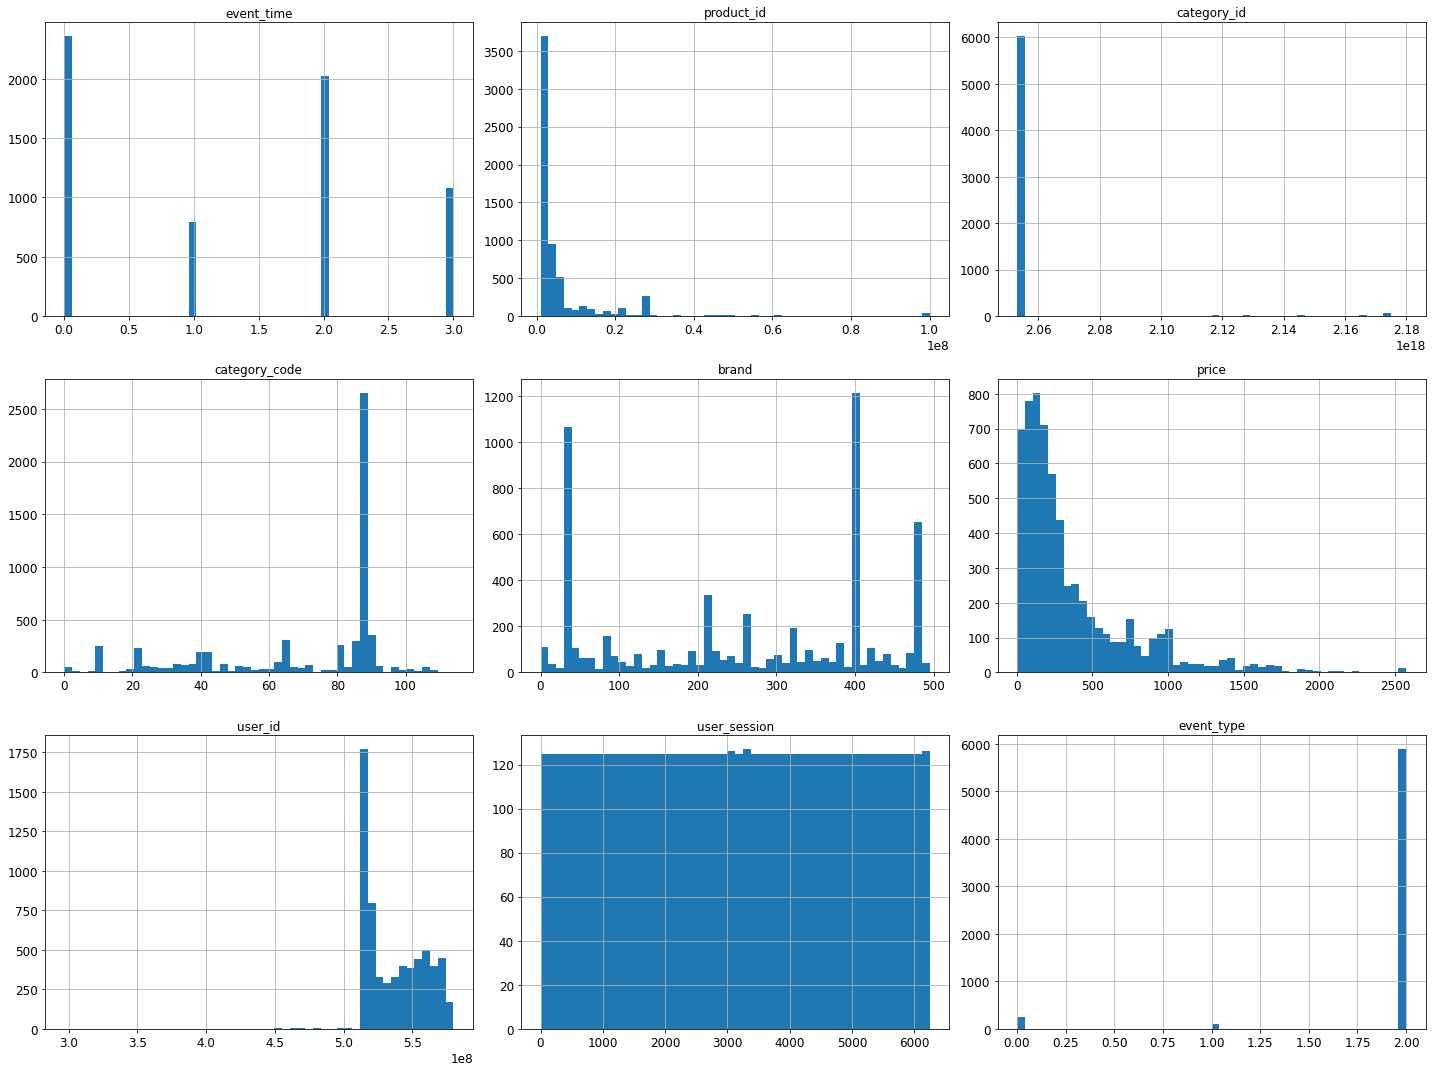

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.figure(dpi=300)
plt.show()

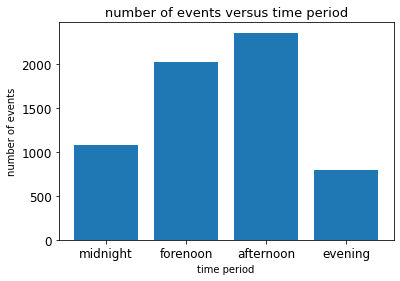

In [24]:
length1 = train["event_time"].value_counts()[2]
length2 = train["event_time"].value_counts()[1]
length3 = train["event_time"].value_counts()[0]
length4 = train["event_time"].value_counts()[3]

data = pd.DataFrame({'midnight':[length1],'forenoon':[length2],'afternoon':[length3],'evening':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.figure(dpi=300)
plt.show()


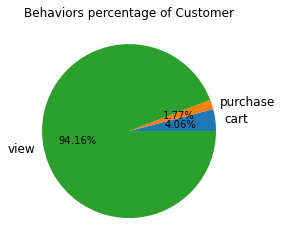

In [25]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.figure(dpi=500)
plt.subplots_adjust(0.3,0,1,1)
plt.show()

In [ ]:
af = train["price"]
import matplotlib.pyplot as plt
af.hist(bins=50, figsize=(10,7.5))
plt.xlabel('price of a product',fontsize=15)
plt.ylabel('number of products',fontsize=15)
plt.figure(dpi=150)
plt.show()

# Models operating

# 1.Linear regression

In [7]:
df1=train.drop(['product_id','category_id','category_code','user_id','user_session'],axis=1)

In [8]:
df1

,event_time,event_type,brand,price
0,midnight,view,steelseries,87.26
1,afternoon,view,samsung,230.89
4,forenoon,view,casio,79.54
6,forenoon,view,huawei,241.90
10,afternoon,view,apple,531.29
12,midnight,view,redmond,31.76
14,midnight,view,vivo,281.58
16,forenoon,view,lg,298.36
17,forenoon,view,samsung,128.42
18,midnight,view,acer,352.90


In [9]:
product_tags = df1.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le = le.fit(product_tags)
label = le.transform(product_tags)
df1.iloc[:, 0] = label\

product_tags1 = df1.iloc[:, 1]
le = LabelEncoder() 
le = le.fit(product_tags1)
label = le.transform(product_tags1)
df1.iloc[:, 1] = label

product_tags2 = df1.iloc[:, 2]
le = LabelEncoder() 
le = le.fit(product_tags2)
label = le.transform(product_tags2)
df1.iloc[:, 2] = label

In [10]:
df1

,event_time,event_type,brand,price
0,3,2,427,87.26
1,0,2,397,230.89
4,2,2,96,79.54
6,2,2,211,241.90
10,0,2,30,531.29
12,3,2,374,31.76
14,3,2,473,281.58
16,2,2,264,298.36
17,2,2,397,128.42
18,3,2,0,352.90


In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [12]:
test_set.head()

,event_time,event_type,brand,price
6800,3,2,485,630.39
2866,1,2,30,1005.35
3430,2,2,325,372.95
5524,0,2,397,643.23
4984,0,1,30,1407.90


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
from sklearn import linear_model

In [33]:
results = smf.ols('event_time ~ event_type + price + brand', data=df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.648
Date:                Sat, 02 Oct 2021   Prob (F-statistic):              0.176
Time:                        00:22:36   Log-Likelihood:                -9702.9
No. Observations:                6254   AIC:                         1.941e+04
Df Residuals:                    6250   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4497      0.075     19.240      0.0

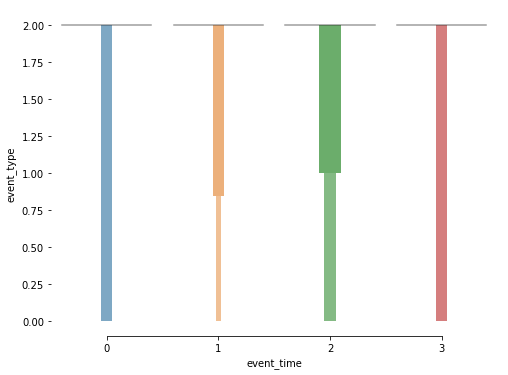

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.boxenplot(x='event_time',y='event_type',data=df1)
sns.despine(trim=True,left=True)

In [15]:
corr=df1.corr()
corr

,event_time,event_type,brand,price
event_time,1.000000,-0.021453,-0.012405,-0.008340
event_type,-0.021453,1.000000,0.008346,-0.018214
brand,-0.012405,0.008346,1.000000,-0.326030
price,-0.008340,-0.018214,-0.326030,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

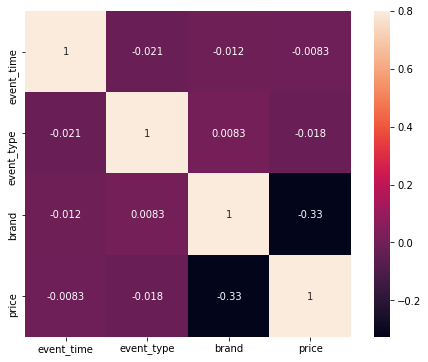

In [16]:
ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Linear regression(2)

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [18]:
cols = list(df1)
cols.insert(1,cols.pop(cols.index('event_time'))) # 2是将d放在哪一列，cols.pop(cols.index('d')) 是要换的d列
df1 = df1.loc[:,cols] # 开始按照两列互换

## 对数据集进行测试集合训练集划分
# X：特征矩阵(类型一般是DataFrame)
# Y：特征对应的Label标签(类型一般是Series)
# test_size: 对X/Y进行划分的时候，测试集合的数据占比, 是一个(0,1)之间的float类型的值
# random_state: 数据分割是基于随机器进行分割的，该参数给定随机数种子；给一个值(int类型)的作用就是保证每次分割所产生的数数据集是完全相同的

X = df1.iloc[:,1:]
Y=df1['event_type']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(5003, 3)
(1251, 3)
(5003,)


In [19]:
# 查看训练集上的数据信息(X)
X_train.describe()

,event_time,brand,price
count,5003.000000,5003.000000,5003.000000
mean,1.300220,261.188087,365.980796
std,1.144417,164.586503,389.164966
min,0.000000,0.000000,1.520000
25%,0.000000,81.000000,112.155000
50%,1.000000,288.000000,227.020000
75%,2.000000,397.000000,463.320000
max,3.000000,495.000000,2574.040000


In [20]:
from sklearn.preprocessing import StandardScaler
## 数据标准化
# StandardScaler：将数据转换为标准差为1的数据集(有一个数据的映射)
# scikit-learn中：如果一个API名字有fit，那么就有模型训练的含义，没法返回值
# scikit-learn中：如果一个API名字中有transform， 那么就表示对数据具有转换的含义操作
# scikit-learn中：如果一个API名字中有predict，那么就表示进行数据预测，会有一个预测结果输出
# scikit-learn中：如果一个API名字中既有fit又有transform的情况下，那就是两者的结合(先做fit，再做transform)
ss = StandardScaler() # 模型对象创建
X_train = ss.fit_transform(X_train) # 训练模型并转换训练集
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 (测试集)

pd.DataFrame(X_train).describe()


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
count,5.003000e+03,5.003000e+03,5.003000e+03
mean,-9.103252e-16,-6.883693e-17,3.816877e-17
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.136255e+00,-1.587094e+00,-9.366137e-01
25%,-1.136255e+00,-1.094902e+00,-6.522971e-01
50%,-2.623606e-01,1.629210e-01,-3.571100e-01
75%,6.115342e-01,8.252529e-01,2.501482e-01
max,1.485429e+00,1.420744e+00,5.674406e+00


In [21]:
## 模型训练
import numpy as np
lr = LinearRegression(fit_intercept=True) # 模型对象构建
'''
LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)
	fit_intercept：是否需要截距
	normalize：是否做标准化，上面已在单拿出来做了标准化
	copy_X：是否进行数据复制，如果复制了，对数据进行修改，就不会改变原数据
	n_jobs：并行运行。但需要CPU至少双核，基本不怎么用
'''
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print("training R2:",lr.score(X_train, Y_train))
print("test R2:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)
# 输出模型训练得到的相关参数
print("model coefficient(θ):", end="")
print(lr.coef_)
print("model intercept:", end='')
print(lr.intercept_)


training R2: 0.000805198853369493
test R2: -0.00010292637395936666
rmse: 0.41021223720853583
model coefficient(θ):[-0.00484279  0.00292203 -0.00940805]
model intercept:1.9002598440935439


### Model testing (require sklearn version =0.24)  

In [22]:
## 模型保存/持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

# 保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss, "df1_ss.model") ## 将标准化模型保存
joblib.dump(lr, "df1_lr.model") ## 将模型保存

['df1_lr.model']

In [23]:
#load model
ss3 = joblib.load("df1_ss.model") 
lr3 = joblib.load("df1_lr.model") 

# predict
df1 = [[3, 398, 127.91]]
df1 = ss.transform(df1)
print(df1)
lr.predict(df1)

[[ 1.48542896  0.83132933 -0.61180891]]


array([1.90125131])

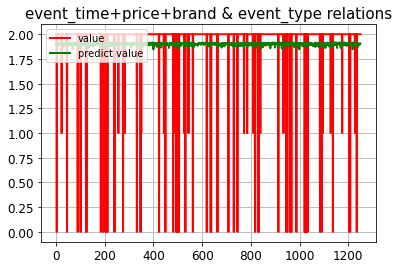

In [44]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='value')
plt.plot(t, y_predict, 'g-', linewidth=2, label='predict value')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("event_time+price+brand & event_type relations", fontsize=15)
plt.grid(b=True)#加网格
plt.show()

# Linear Regression(3)

In [45]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
results = smf.ols(formula='event_time ~ event_type + price', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.678
Date:                Sat, 02 Oct 2021   Prob (F-statistic):              0.187
Time:                        00:22:45   Log-Likelihood:                -9703.7
No. Observations:                6254   AIC:                         1.941e+04
Df Residuals:                    6251   BIC:                         1.943e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4134      0.070     20.297      0.0

# 2.Random forest

In [46]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [47]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

Single Tree:0.8811933937133724 Random Forest:0.9057005860415557


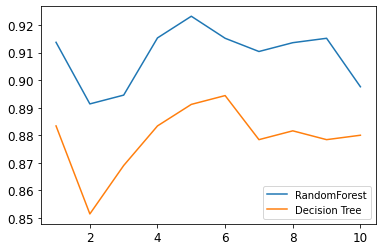

In [48]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,Y,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X,Y,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

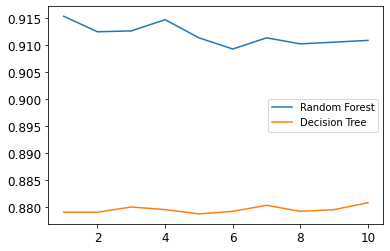

In [49]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X,Y,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X,Y,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

# 3.KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
knn = KNeighborsClassifier()    #实例化KNN模型
knn.fit(X_train, Y_train)      #放入训练数据进行训练
score_k = knn.score(Xtest,Ytest)
print(score_k)

0.9461907298881194


# 4.ADA Boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
ada = AdaBoostClassifier()    #实例化KNN模型
ada.fit(X_train, Y_train)       #放入训练数据进行训练
score_k = ada.score(Xtest,Ytest)
print(score_k)

0.9408630793819925


# 5.Netural network

In [54]:
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)  # apply scaling on training data
pipe.score(X_test, Y_test)

0.96

In [55]:
from sklearn.neural_network import MLPClassifier


rdm = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(6228,1500,1000,), random_state=1)
rdm.fit(X_train, Y_train)
rdm.score(X_test,Y_test)

0.92